In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
datas = pd.read_csv('600031.csv')
weight = [13, 35, 26, 1, 1]
pred = [22.57870275, 21.78401558, 20.9893284 , 20.19464123, 19.39995405]
# weight = [12, 37, 35, 3, 1]
# pred = [25.49806704, 24.53348299, 23.56889894, 22.60431488, 21.63973083]
seq = datas['BSI1'] * weight[0] + datas['openNR'] * weight[1] + datas['closeNR'] * weight[2] + datas['highNR'] * weight[3] + datas['lowNR'] * weight[4]
seqs = pd.DataFrame(seq)
seqs.columns = ['seq']
new_seq = pd.DataFrame(pred)
new_seq.columns = ['seq']
seqs = seqs.append(new_seq)
seqs = seqs.reset_index()
seqs = seqs.drop(['index'], axis = 1)
seqs.tail()

,seq
60,22.578703
61,21.784016
62,20.989328
63,20.194641
64,19.399954


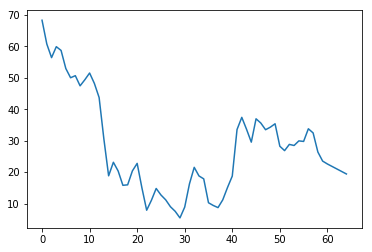

In [3]:
plt.plot(seqs)
plt.savefig('pic/600031_fin_BSI1_index_pred')
plt.show()

In [4]:
MA10 = []
MA5 = []
for day in range(len(seqs['seq'])):
    if day < 4:
        MA5.append(0)
        MA10.append(0)
    elif day < 9:
        MA5.append(seqs.loc[day - 4:day + 1].mean().values[0])
        MA10.append(0)
    else:
        MA5.append(seqs.loc[day - 4:day + 1].mean().values[0])
        MA10.append(seqs.loc[day - 9:day + 1].mean().values[0])
MA = pd.DataFrame()
MA['MA5'] = MA5
MA['MA10'] = MA10
MA.tail()

,MA5,MA10
60,26.744299,27.656246
61,24.613483,27.125747
62,22.570822,26.343154
63,21.407665,25.519800
64,20.989328,25.079743


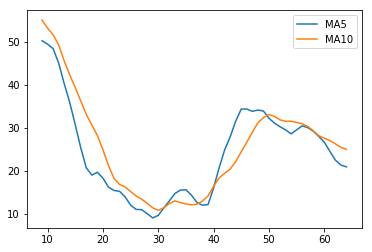

In [5]:
plt.plot(MA['MA5'].loc[9:], label='MA5')
plt.plot(MA['MA10'].loc[9:], label='MA10')
plt.legend(loc='best')
plt.savefig('pic/600031_fin_BSI1_index_EMA')
plt.show()

In [6]:
flag = MA['MA5'] - MA['MA10']
flag = flag.apply(lambda x: 1 if x >= 0 else 0)

fork_gold = []
fork_dead = []
last = flag[10]
for day in range(11, len(flag)):
    if flag[day] != last:
        if flag[day] == 0:
            fork_dead.append(day)
        else:
            fork_gold.append(day)
        last = flag[day]
print('金叉点: ', fork_gold)
print('死叉点: ', fork_dead)

金叉点:  [32, 41]
死叉点:  [38, 50]


In [7]:
import tushare as ts
fin_datas = ts.get_hist_data('600031', start='2021-10-11', end='2022-01-10')
fin_datas = fin_datas.reset_index()
fin_datas = fin_datas.sort_values('date',ascending=True)
fin_datas = fin_datas.reset_index()
fin_datas = fin_datas.drop(['index', 'date'], axis = 1)
fin_datas

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
0,26.18,26.38,25.93,25.88,850601.06,-0.23,-0.88,25.614,25.775,26.853,981777.91,1103709.89,1420205.53,1.00
1,25.81,25.90,25.39,25.15,984220.06,-0.54,-2.08,25.620,25.671,26.716,994331.31,1104706.38,1371127.23,1.16
2,25.26,25.58,25.43,25.25,611173.44,0.04,0.16,25.670,25.629,26.525,910566.72,1037763.89,1254026.51,0.72
3,25.44,25.76,25.62,25.38,674322.38,0.19,0.75,25.706,25.557,26.350,864613.69,987223.76,1196098.50,0.79
4,25.65,25.69,25.27,25.20,719281.44,-0.35,-1.37,25.528,25.496,26.198,767919.68,957831.81,1139041.74,0.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,22.79,22.89,22.80,22.52,770091.19,0.00,0.00,23.168,23.287,23.493,811271.89,787512.48,1345408.10,0.91
61,22.81,23.29,23.08,22.66,1275573.62,0.28,1.23,23.034,23.252,23.435,888973.11,845500.99,1211791.49,1.50
62,22.91,24.10,23.85,22.86,2285160.50,0.77,3.34,23.134,23.316,23.440,1210362.06,1008600.68,1194414.82,2.69
63,23.77,25.11,24.81,23.75,3204665.75,0.96,4.03,23.468,23.445,23.490,1702515.55,1227597.26,1262811.65,3.77


In [8]:
MA_old = fin_datas[['ma5', 'ma10']]
MA_old = MA_old.reset_index()
MA_old = MA_old[['ma5', 'ma10']]
MA_old.columns = ['MA5', 'MA10']
MA_old.tail()

,MA5,MA10
60,23.168,23.287
61,23.034,23.252
62,23.134,23.316
63,23.468,23.445
64,23.880,23.595


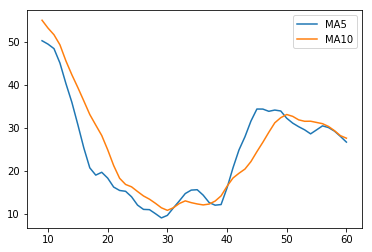

In [9]:
plt.plot(MA['MA5'].loc[9:60], label='MA5')
plt.plot(MA['MA10'].loc[9:60], label='MA10')
plt.legend(loc='best')
plt.savefig('pic/600031_fin_EMA')
plt.show()

In [10]:
flag_old = MA_old['MA5'] - MA_old['MA10']
flag_old = flag_old.apply(lambda x: 1 if x >= 0 else 0)

fork_gold_old = []
fork_dead_old = []
last = flag_old[10]
for day in range(11, len(flag_old)):
    if flag_old[day] != last:
        if flag_old[day] == 0:
            fork_dead_old.append(day)
        else:
            fork_gold_old.append(day)
        last = flag_old[day]
print('金叉点: ', fork_gold_old)
print('死叉点: ', fork_dead_old)

金叉点:  [32, 41, 57, 63]
死叉点:  [38, 50, 59]


In [11]:
price = fin_datas['close'].tolist()
earn = price[fork_dead[-1]] - price[fork_gold[0]]
print('新每股收益: ', earn)
earn_old = price[fork_dead_old[-1]] - price[fork_gold_old[0]]
print('旧每股收益: ', earn_old)

新每股收益:  0.5899999999999999
旧每股收益:  0.240000000000002
